#### Part 3 Exercise 2

In [28]:
import pandas as pd
import ast
import itertools
import networkx as nx

In [4]:
df = pd.read_csv('../Week 3/paper_dataset.csv')
lsts = [ast.literal_eval(lst) for lst in df.authorIds.values]
print(len(lsts))

203182


In [6]:
dictionary = dict()
for lst in lsts[:1000]:
    a = itertools.combinations(lst, 2)
    y = [(i[0], i[1]) for i in a]
    for tuple in y:
        try: tuple = int(tuple[0]), int(tuple[1])
        except: continue
        if tuple[0] > tuple[1]:
            new_tuple = tuple[1], tuple[0]
        else:
            new_tuple = tuple
        if new_tuple in dictionary:
            dictionary[new_tuple] += 1
        else:
            dictionary[new_tuple] = 1

In [19]:
from collections import defaultdict

dictionary = defaultdict(int)
for lst in lsts:
    a = set(itertools.combinations(lst, 2))
    for tuple in a:
        try: 
            tuple = int(tuple[0]), int(tuple[1])
            if tuple[0] > tuple[1]:
                tuple = tuple[1], tuple[0]
            dictionary[tuple] += 1
        except: 
            continue


In [26]:
df_authors = pd.read_csv('../Week 3/author_dataset.csv')
authors = [int(value) for value in df_authors["AuthorID"].values]
authors[:10]

[5639312,
 1716904,
 1841757,
 3994427,
 2047340230,
 2150711523,
 14792101,
 48375969,
 152257305,
 145884449]

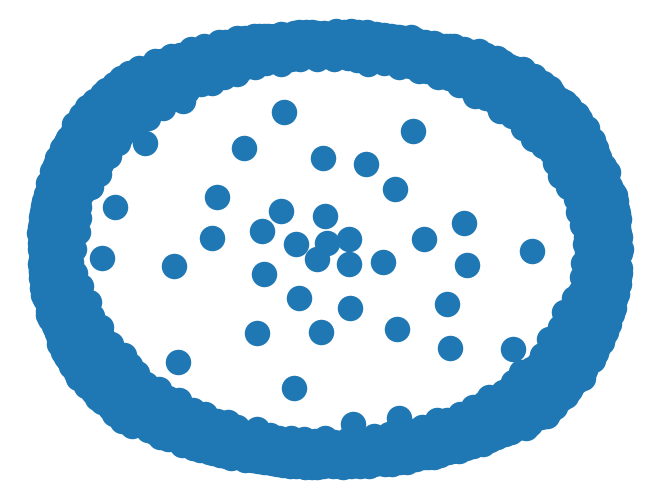

In [32]:
G = nx.Graph()
G.add_nodes_from(authors)

In [34]:
lst1 = [key[0] for key in dictionary.keys()]
lst2 = [key[1] for key in dictionary.keys()]
lst3 = [value for value in dictionary.values()]


In [39]:
print(lst1)
print(lst2)

In [37]:
G.add_edges_from(lst1, lst2)

TypeError: Graph.add_edges_from() takes 2 positional arguments but 3 were given

KeyboardInterrupt: 

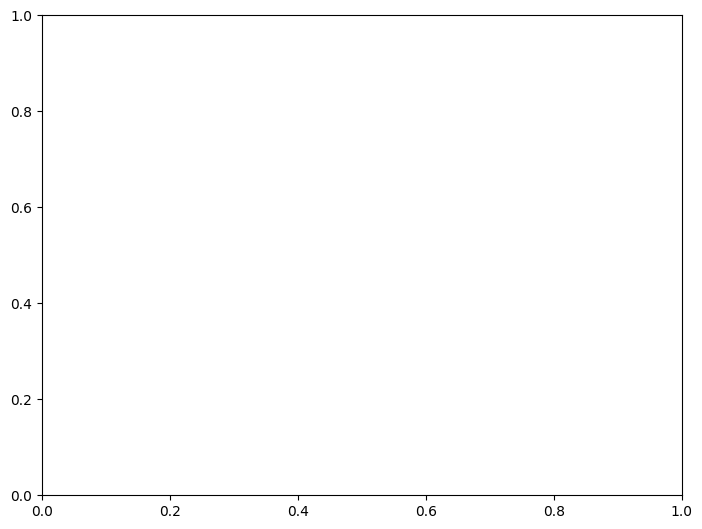

In [30]:
G = nx.Graph()
G.add_nodes_from(authors)
for key, value in dictionary.items():
    G.add_edge(key[0], key[1], weight=value)

nx.draw(G)
    